In [59]:
import numpy as np
import sympy as sp
from sympy import *
from scipy.interpolate import approximate_taylor_polynomial 
import matplotlib.pyplot as plt


1 упражнение

In [60]:

f = open('t1.txt','a')
f.write('ТАБЛИЦА ЗНАЧЕНИЙ ПРОИЗВОДНЫХ ФУНКЦИИ cos x\n')
f.write(' _______________________\n')
f.write('| n | derivative |\n')
f.write(' _______________________\n')

for i in range(1,6):
    x=symbols('x')
    y=sp.cos(x)
    y1=diff(y,x,i)
    y1=y1.subs(x,1)
    y1=y1.evalf()
    f.write("|{x:1} | {y:11.8f} |\n".format(x=i, y=y1))

f.close()


2 упраженение

In [116]:
def F(f,x0,n):
    x=Symbol('x')
    mas=[]
    for i in range(0,n+1):
        pr=diff(f,x,i)
        pr1=pr.subs(x,x0)#/(np.math.factorial(i))
        mas.append(pr1)
    return mas

    """for degree in range(1,n+1):
        f_taylor = approximate_taylor_polynomial(f, x0, degree, 1, order=None)
        A.append(f_taylor(x0))"""
x=Symbol('x')       
print(F(sp.sin(x),0,4))
print(F(sp.cos(x),0,4))
print(F(sp.ln(x+1),0,4))

[0, 1, 0, -1, 0]
[1, 0, -1, 0, 1]
[0, 1, -1, 2, -6]


3 упражнение


Аппроксимацией функции называется приближенное представление,
сложной (имеющей громоздкое математическое представление) или
заданной в виде таблицы функции f (x) более простой функцией ψ (х),
имеющей минимальные отклонения от исходной функции в заданной области х.
Чем больше оцениваемых членов, тем лучше аппроксимация.


In [126]:
def func1(f,x0,n):
    x=Symbol('x')
    mas=[]
    for i in range(0,n+1):
        pr=diff(f,x,i)
        pr1=pr.subs(x,x0)
        mas.append(pr1)
    return mas

def func2(x0,n,func1):
    A=[]
    for i in range(0,n+1):
        c=((func1[i]/(np.math.factorial(i)))*(x-x0)**i).evalf()
        A.append(c)
    return sum(A)
x=Symbol('x')  
print(func2(0,4,func1(sp.sin(x),0,4)))
print(func2(0,4,func1(sp.cos(x),0,4)))
print(func2(0,4,func1(sp.ln(x+4),0,4)))

-0.166666666666667*x**3 + x
0.0416666666666667*x**4 - 0.5*x**2 + 1.0
-0.0009765625*x**4 + 0.00520833333333333*x**3 - 0.03125*x**2 + 0.25*x + 1.38629436111989


C:\Users\вольвокс\AppData\Local\Temp\ipykernel_15784\2001556387.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  c=((func1[i]/(np.math.factorial(i)))*(x-x0)**i).evalf()


In [73]:
def func(f, x0, n, plot):
    x = np.linspace(-10,10,100)
    if plot == True:
        plt.plot(x, f(x + x0), label=str(f)[8:][:3])#рисуем исходную функцию
    A = []#создаем пустую вектор строку
    A.append(f(x0))#первый элемент(значение функции в точке)
    for degree in range(1,n+1):
        f_taylor = approximate_taylor_polynomial(f, x0, degree, 1, order=None)#раскладываем f(x) в ряд Тейлора
        print(f_taylor)
        if plot == True:
            plt.plot(x, f_taylor(x), label=f'degree = {degree}')#рисуем результат разложения
        A.append(f_taylor(x0))#добавляем в вектор значения производных
        print(A)
    if plot == True:
        plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
        plt.tight_layout()
        plt.axis([-10,10, -10,10])
        plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.show()
        
    return A

 
0.8415 x
[0.0, 0.0]
         2
-0.1565 x + 0.9589 x + 0.03913
[0.0, 0.0, 0.03912669746683653]
         3             2
-0.1545 x - 5.551e-17 x + 0.996 x - 2.107e-17
[0.0, 0.0, 0.03912669746683653, -2.1065685354484934e-17]
          4          3            2
0.007992 x - 0.1605 x - 0.005994 x + 0.9995 x + 0.0004995
[0.0, 0.0, 0.03912669746683653, -2.1065685354484934e-17, 0.0004995154604224173]


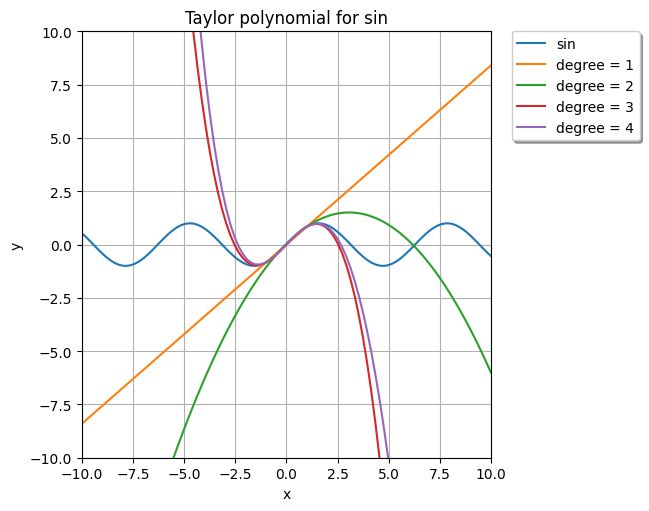

[0.0, 0.0, 0.03912669746683653, -2.1065685354484934e-17, 0.0004995154604224173]


In [74]:
print(func(np.sin,0,4,True))

 
-0.4597 x + 1
[1.0, 1.0]
         2
-0.4497 x - 1.11e-16 x + 0.99
[1.0, 1.0, 0.9900093138977838]
         3          2
0.03963 x - 0.4795 x - 0.01981 x + 1
[1.0, 1.0, 0.9900093138977838, 0.9999999999999999]
         4             3          2
0.03929 x + 2.776e-16 x - 0.4989 x - 2.307e-16 x + 0.9999
[1.0, 1.0, 0.9900093138977838, 0.9999999999999999, 0.9999158686999747]


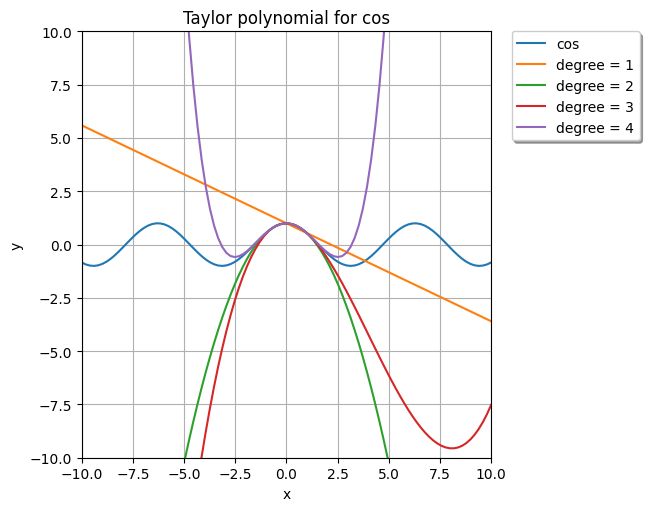

[1.0, 1.0, 0.9900093138977838, 0.9999999999999999, 0.9999158686999747]


In [75]:
print(func(np.cos,0,4,True))

 
0.2231 x + 1.386
[1.3862943611198906, 2.2788685663767296]
          2
-0.02706 x + 0.2513 x + 1.385
[1.3862943611198906, 2.2788685663767296, 1.9574472276242798]
          3           2
0.004476 x - 0.03175 x + 0.2504 x + 1.386
[1.3862943611198906, 2.2788685663767296, 1.9574472276242798, 2.1664607150335002]
            4            3           2
-0.0008407 x + 0.005359 x - 0.03137 x + 0.25 x + 1.386
[1.3862943611198906, 2.2788685663767296, 1.9574472276242798, 2.1664607150335002, 2.0120561544727193]


C:\Users\вольвокс\AppData\Local\Temp\ipykernel_15784\3964792092.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(x, f(x + x0), label=str(f)[8:][:3])#рисуем исходную функцию


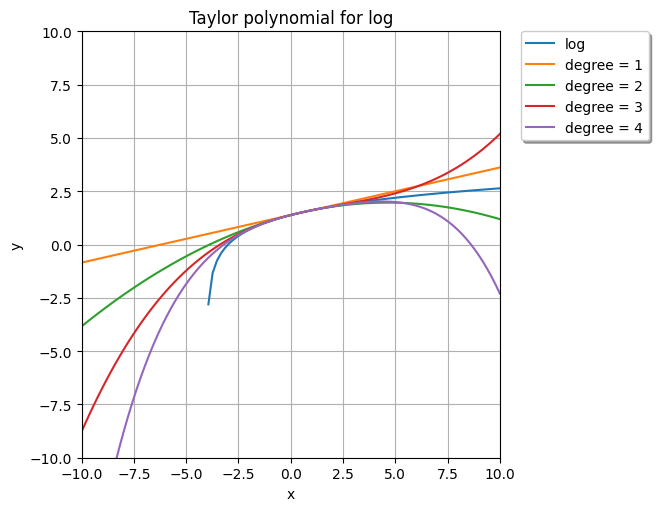

[1.3862943611198906, 2.2788685663767296, 1.9574472276242798, 2.1664607150335002, 2.0120561544727193]


In [92]:
print(func(np.log,0+4,4,True))

C1

C:\Users\вольвокс\AppData\Local\Temp\ipykernel_15784\3964792092.py:4: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, f(x + x0), label=str(f)[8:][:3])#рисуем исходную функцию


 
0.2361 x + 2
[2.0, 2.944271909999159]
        2
-0.014 x + 0.2505 x + 2
[2.0, 2.944271909999159, 2.777579105094036]
          3           2
0.001716 x - 0.01578 x + 0.2501 x + 2
[2.0, 2.944271909999159, 2.777579105094036, 2.857864768764327]
            4            3           2
-0.0002666 x + 0.001994 x - 0.01566 x + 0.25 x + 2
[2.0, 2.944271909999159, 2.777579105094036, 2.857864768764327, 2.808822369746876]


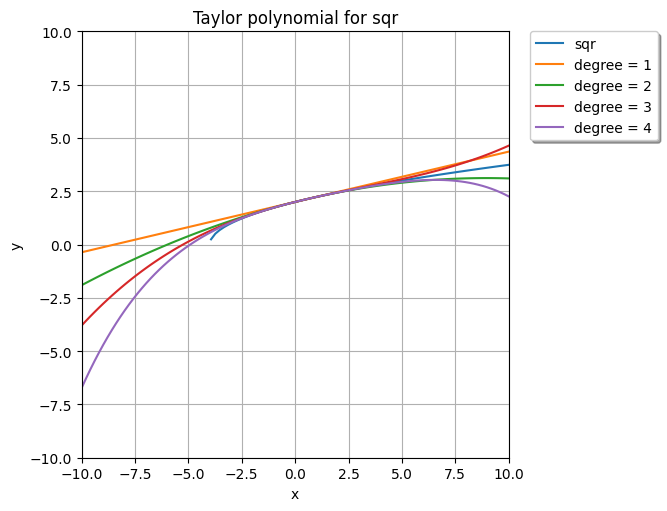

[2.0, 2.944271909999159, 2.777579105094036, 2.857864768764327, 2.808822369746876]


In [128]:
print(func(np.sqrt,4,4,True))

C2

In [154]:
f=approximate_taylor_polynomial(np.sin, 0, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)
f=approximate_taylor_polynomial(np.cos, 0, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)
f=approximate_taylor_polynomial(np.exp, 0, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)
f=approximate_taylor_polynomial(np.log, 1, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)
f=approximate_taylor_polynomial(np.tan, 0, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)

            7             6            5             4          3
-0.0001916 x + 1.057e-15 x + 0.008328 x - 1.342e-15 x - 0.1667 x
             2
 + 4.98e-16 x + 1 x - 5.128e-17
           7            6             5           4             3
2.412e-05 x - 0.001352 x - 3.618e-05 x + 0.04165 x + 1.508e-05 x
        2
 - 0.5 x - 1.508e-06 x + 1
           7            6            5           4          3       2
0.0002309 x + 0.001427 x + 0.008289 x + 0.04165 x + 0.1667 x + 0.5 x + 1 x + 1
        7         6          5          4           3          2
0.5339 x - 1.119 x + 0.4338 x + 0.2918 x + 0.08098 x - 0.5594 x + 1.031 x - 3.469e-18
       7             6            5             4         3
0.185 x - 3.553e-15 x - 0.005837 x + 4.774e-15 x + 0.383 x
              2
 - 7.321e-16 x + 0.9953 x - 2.939e-16


In [155]:
f=approximate_taylor_polynomial(np.sin, np.pi/2, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)
f=approximate_taylor_polynomial(np.cos, np.pi/2, 7, 1, order=None)#раскладываем f(x) в ряд Тейлора
print(f)

           7            6             5           4             3
2.412e-05 x - 0.001352 x - 3.618e-05 x + 0.04165 x + 1.508e-05 x
        2
 - 0.5 x - 1.508e-06 x + 1
           7             6            5             4          3
0.0001916 x - 1.868e-15 x - 0.008328 x + 2.534e-15 x + 0.1667 x
              2
 - 9.623e-16 x - 1 x + 1.431e-16


In [ ]:
#Вопросы:
#1)Как можно использовать многочлены Тейлора для приближенных оценок значений функции?
#(Формула Тейлора широко используется при аппроксимации функций в различных научных и инженерных задачах.
#oна позволяет приблизить функцию с заданной точностью, заменив ее многочленом высокой степени, построенным
# на основе значения функции и ее производных в заданной точке)

#2)Как изменяется ошибка в оценках значений функции с помощью формулы Тейлора при увеличении порядка многочлена?
#(Чем больше оцениваемых членов, тем лучше аппроксимация)

#3)Как изменяется ошибка в оценках значений функции с помощью формулы Тейлора при удалении значений аргумента от точки разложения?
#(Увеличивается)

